This notebook will go through a simulation of a single leaky integrate and fire neuron, to which a constant external current has been applied.<br/>
The mean firing rate-input current (f-I) curve for two LIF neurons, where one has a refractory period of 5 ms, while the second has no refractory period is displayed.<br/>
Finally the same simulation is run again, for the case when a time varying input current is applied to the neuron, at each timestep of the simulation.

In [11]:
from brian2 import *
%matplotlib inline

Import the brian2 library and the matplotlib library for visualisation of behaviour.
Define the model parameters below:

In [12]:
Neurons = 2
tau_m = 10 * ms
reset_pot = 0 * mV
thresh = 15 * mV
In_cur = 20 * mV

Where Neurons stores the number of neurons in the network.<br />
__tau_m__ is the membrane time constant <br />
__reset_pot__ is the reset potential, and will be used as the time of the first spike and as the value to which the membrane potential is reset to after a spike has occured<br />
__thresh__ is the value of the threshold potential, and will be compared against the membrane potential in order to determine if a spike has occured <br />
__In_cur__ represents the input current which initially is kept constant in order to simulate the behaviour of the membrane potential more clearly<br />
<br />
Next we define the equations that model the spiking behaviour of the neurons. <br />

In [13]:
model_eqs = '''
dv/dt = (-v + I)/tau_m : volt
I : volt
'''

Having defined the equation that models the neurons dynamics, we can create a network of such neurons, and also set some of the individual neuron parameters.<br />
Randomness can be introduced in the intial value of the membrane potential of the neurons.<br />
To change the value of the input current for each neuron, the last line should be modified.<br />

In [14]:
start_scope()
network = NeuronGroup(Neurons, model=model_eqs, threshold='v>thresh',reset='v=reset_pot')
network.v = reset_pot
network.I = In_cur

We create two monitors to track the times when the spikes occur in the network simulation and to trace the values of the membrane potential variable for each neuron in the network.<br />

In [15]:
spikes = SpikeMonitor(network)
trace_v = StateMonitor(network, ['v'], record=True)

Start running the simulation by setting the timestep value and plot the behaviour of the neurons over the considered interval.

INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.03s). [brian2.stateupdaters.base.method_choice]


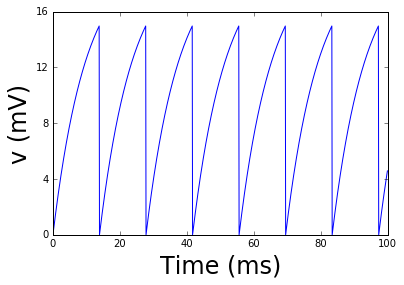

In [16]:
run(0.1*second)
figure(1)
plot(trace_v.t/ms, trace_v[0].v/mV)
xlabel('Time (ms)', fontsize=24)
ylabel('v (mV)', fontsize=24)
yticks([0,4,8,12,16])
show()

Now we plot the mean firing rate-input current (__f-I__) curve for two LIF neurons, where one has a refractory period of 5 ms and the other one represents the model defined so far.

In [17]:
refract_delta = 5
tau_mem = 10
v_th = 15
Is = linspace(0,50,51)

Define the dynamics of the two neurons as two functions f1 and f2 such that one has a refractory period after spiking and the other doesn't.

In [18]:
f1 = 1.0 / (tau_mem * log(Is / (Is - v_th)))
f2 = 1.0 / (refract_delta + tau_mem * log(Is / (Is - v_th)))

WARNING    __main__:1: RuntimeWarning: divide by zero encountered in divide
 [py.warnings]

WARNING    __main__:2: RuntimeWarning: divide by zero encountered in divide
 [py.warnings]



Display the two neuron models simulated over the same interval as before.

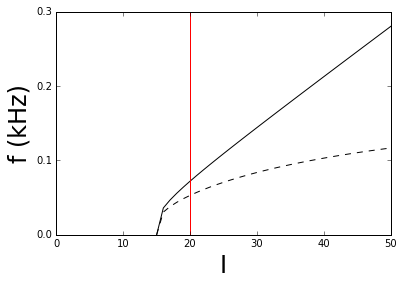

In [19]:
figure(2)
plot(Is, f1, 'k-')
plot(Is, f2, 'k--')
plot([20, 20], [0, 0.3], 'r-')
xlabel('I', fontsize=24)
ylabel('f (kHz)', fontsize=24)
yticks([0, .1, .2, .3])
show()

INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


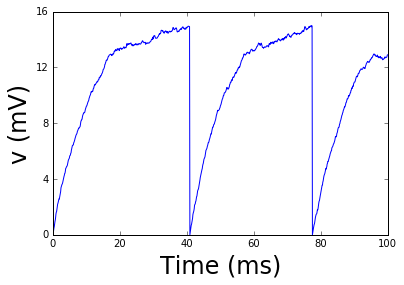

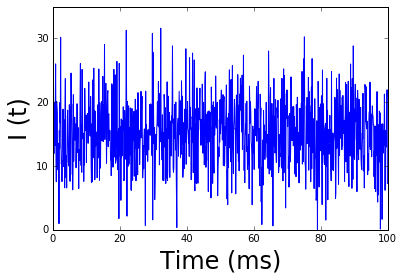

In [21]:
start_scope()
Neurons = 2
tau_m = 10 * ms
reset_pot = 0 * mV
thresh = 15 * mV
In_cur = TimedArray((15 + 5*randn(1000))*mV,dt=0.1*ms)

model_eqs = '''
dv/dt = (-v + I)/tau_m : volt
I = In_cur(t) : volt
'''
network = NeuronGroup(Neurons, model=model_eqs, threshold='v>thresh',reset='v=reset_pot')
network.v = reset_pot
spikes = SpikeMonitor(network)
trace_v = StateMonitor(network, ['v'], record=True)
trace_I = StateMonitor(network, ['I'], record=True)

run(0.1*second)

figure(1)
plot(trace_v.t/ms, trace_v[0].v/mV)
xlabel('Time (ms)', fontsize=24)
ylabel('v (mV)', fontsize=24)
yticks([0,4,8,12,16])

figure(2)
plot(trace_I.t/ms, trace_I[0].I/mV)
xlabel('Time (ms)', fontsize=24)
ylabel('I (t)', fontsize=24)
yticks([0,10,20,30])
show()

We used the __start_scope()__ function so that no Brian objects created before the function is called are included in the next run of the simulation.<br/>
Next we have modified the value of __In_cur__ so that it takes a random value for each time of the simulation. Using __TimedArray__ we have created a list of times, where the first parameter creates an array of values providing the values at various points in time, and the second parameter specifies the time distance between values in the created array.<br/>
In order for these times to be used during simulation, by our network, we have to specify the change in the equation. This is done by the __I = In_cur(t) : volt__ line.<br/>
The first graph shows the evolution of the membrane voltage over the course of the simultion, as it can be see, the value increases until the threshold voltage is reached, and it is then reset to the resting potential.<br/>
The second graph shows the values of the current __I__ applied to the neuron at each time step __t__.